# Similarity of recipes
•	Analysiere die „Ähnlichkeit“ von Rezepten auf  Grundlage der Zutaten (z.B. Desserts, Kuchen und Hauptgerichte)

In [1]:
import pandas as pd
import numpy as np
import scipy.cluster.hierarchy as shc

In [2]:
df_ingred = pd.read_csv("Data/ingredients.csv")
df_recipes = pd.read_csv("Data/recipes.csv")

num_dup_ingreds = df_ingred.duplicated().sum()
df_ingred.drop_duplicates(inplace=True)

num_dup_recipes = df_recipes.duplicated().sum()
df_recipes.drop_duplicates(inplace=True)

df_merged = pd.merge(df_recipes, df_ingred, left_on="ID", right_on="ID_recipe")

### Similarity of recipes based on domain knowledge

In [44]:
cake = ["sugar", "flour", "milk"]
pat = "|".join(cake)
cake_recipes = df_ingred.set_index("ingredients").filter(regex=pat, axis=0).reset_index(level=0).groupby("ID_recipe").count().query(f"ingredients >= {len(cake)}").index

# look at cake recipes
df_recipes.set_index("ID").loc[cake_recipes].reset_index(level=0).groupby("cuisine").count().nsmallest(5, columns="ID_recipe")

,ID_recipe
cuisine,
korean,9
moroccan,16
vietnamese,23
brazilian,25
greek,28


### Similarity of cusine based on cluster

In [49]:
df = pd.read_csv("Data/own_reduced_merged2.csv")
selected_data = df.drop(["cuisine", "Unnamed: 0", "ID"], axis=1)
clusters = shc.linkage(selected_data, 
            method='ward', 
            metric="euclidean")

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [35.0, 35.0, 52.5, 52.5],
  [25.0, 25.0, 43.75, 43.75],
  [10.0, 10.0, 34.375, 34.375],
  [75.0, 75.0, 85.0, 85.0],
  [115.0, 115.0, 125.0, 125.0],
  [105.0, 105.0, 120.0, 120.0],
  [95.0, 95.0, 112.5, 112.5],
  [80.0, 80.0, 103.75, 103.75],
  [22.1875, 22.1875, 91.875, 91.875],
  [155.0, 155.0, 165.0, 165.0],
  [175.0, 175.0, 185.0, 185.0],
  [160.0, 160.0, 180.0, 180.0],
  [145.0, 145.0, 170.0, 170.0],
  [195.0, 195.0, 205.0, 205.0],
  [225.0, 225.0, 235.0, 235.0],
  [215.0, 215.0, 230.0, 230.0],
  [200.0, 200.0, 222.5, 222.5],
  [157.5, 157.5, 211.25, 211.25],
  [135.0, 135.0, 184.375, 184.375],
  [57.03125, 57.03125, 159.6875, 159.6875],
  [245.0, 245.0, 255.0, 255.0],
  [265.0, 265.0, 275.0, 275.0],
  [250.0, 250.0, 270.0, 270.0],
  [295.0, 295.0, 305.0, 305.0],
  [285.0, 285.0, 300.0, 300.0],
  [260.0, 260.0, 292.5, 292.5],
  [315.0, 315.0, 325.0, 325.0],
  [335.0, 335.0, 345.0, 345.0],


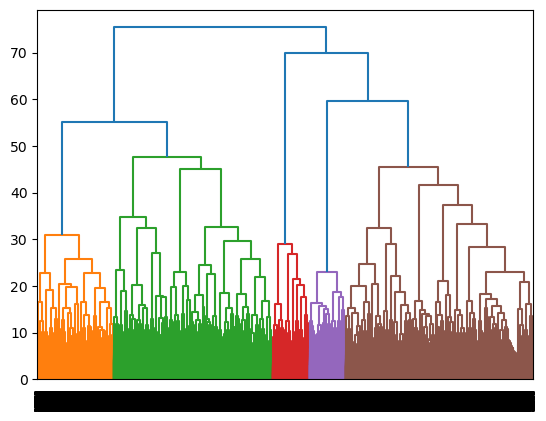

: 

In [50]:
shc.dendrogram(Z=clusters)

### Similarity in number of ingredients

In [2]:
df_res = pd.read_csv("Data/own_merged.csv", usecols = range(1,100))

In [4]:
df_res.describe()

,ID,ID_recipe,( oz.) tomato sauce,( oz.) tomato paste,(10 oz.) frozen chopped spinach,"(10 oz.) frozen chopped spinach, thawed and squeezed dry",(14 oz.) sweetened condensed milk,(14.5 oz.) diced tomatoes,(15 oz.) refried beans,1% low-fat buttermilk,...,Challenge Butter,Chambord Liqueur,Chartreuse Liqueur,Chianti,Chinese egg noodles,Chinese rice vinegar,Chinese rose wine,Chinese sesame paste,Cholula Hot Sauce,Ciabatta rolls
count,39774.000000,39774.000000,39774.000000,39774.000000,39774.000000,39774.000000,39774.000000,39774.000000,39774.000000,39774.000000,...,39774.000000,39774.000000,39774.000000,39774.000000,39774.000000,39774.000000,39774.000000,39774.000000,39774.000000,39774.000000
mean,24849.536959,24849.536959,0.000277,0.000226,0.000075,0.000050,0.000050,0.000075,0.000075,0.000101,...,0.000025,0.000025,0.000025,0.000251,0.001106,0.000201,0.000126,0.000126,0.000101,0.000050
std,14360.035505,14360.035505,0.016628,0.015041,0.008685,0.007091,0.007091,0.008685,0.008685,0.010028,...,0.005014,0.005014,0.005014,0.015854,0.033242,0.014181,0.011211,0.011211,0.010028,0.007091
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12398.250000,12398.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,24887.000000,24887.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37328.500000,37328.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,49717.000000,49717.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
# https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/
selected_data = df_res.iloc[:, 4:]
clusters = shc.linkage(selected_data, 
            method='ward', 
            metric="euclidean")

: 

: 

In [ ]:
shc.dendrogram(Z=clusters)